# Séparation et évaluation pour la planification de visites aux urgences

<div style="text-align: right;">
Mathias LOMMEL
    
<div style="text-align: right;">
Lucas OFFROY

<div style="text-align: right;">
4MA


## 4 -  Quelques exemples...

Nous allons ici tester brièvement nos algorithmes, afin de s'assurer que ceux-ci fonctionnent bien et donnent la même valeur optimale. Nous allons donc créer des cas tests, "sans trop se poser de question", simplement pour s'assurer de la bonne implémentation de notre code.

On commence par exemple, avec l'exemple traité en TD, pour lequel nous connaissons la valeur optimale (z=12).

In [15]:
# Exemple du cours
P=[4,5,3,5]
D=[12,8,15,9]
H=[16,26,25,27]

print("\n")
@time printBB(solve_PLNE(PLNE(P,D,H)))
print("\n")
@time printBB(Branch_Bound_v1(P,D,H))
print("\n")
@time printBB(Branch_Bound_v2(P,D,H))
print("\n")
@time printBB(Branch_Bound_v3(P,D,H))
print("\n")


Pénalités : 12
Ordre de passage :
1--> Patient 4
2--> Patient 1
3--> Patient 2
4--> Patient 3
  3.255529 seconds (5.76 M allocations: 375.180 MiB, 3.35% gc time, 97.37% compilation time: 4% of which was recompilation)

Pénalités : 12
Ordre de passage :
1--> Patient 1
2--> Patient 2
3--> Patient 4
4--> Patient 3
  0.312921 seconds (270.60 k allocations: 17.270 MiB, 99.57% compilation time)

Pénalités : 12
Ordre de passage :
1--> Patient 1
2--> Patient 2
3--> Patient 4
4--> Patient 3
  0.001119 seconds (444 allocations: 18.414 KiB)

Pénalités : 12
Ordre de passage :
1--> Patient 1
2--> Patient 2
3--> Patient 4
4--> Patient 3
  2.572664 seconds (3.19 M allocations: 211.336 MiB, 3.12% gc time, 97.72% compilation time)



On observe ainsi que les 4 algorithmes implémentés dans la partie précédente, convergent bien tous vers la même valeur optimale. Toutefois, nous pouvons voir que l'ordre rendu n'est, sur ce test, pas le même pour toutes les implémentations. Ce résultat était prévisible, puisqu'en TD nous avions vu qu'il existait plusieurs solutions optimales.

On se propose maintenant de tester sur une autre instance, de dimension plus grande.

In [16]:
# Nouvel exemple
P=[4,5,3,5,4,4,5,4,5,7]
D=[12,8,15,9,15,17,12,48,45,1]
H=[16,26,25,27,20,15,14,14,12,15]

print("\n")
@time printBB(solve_PLNE(PLNE(P,D,H)))
print("\n")
@time printBB(Branch_Bound_v1(P,D,H))
print("\n")
@time printBB(Branch_Bound_v2(P,D,H))
print("\n")
@time printBB(Branch_Bound_v3(P,D,H))
print("\n")


Pénalités : 1298
Ordre de passage :
1--> Patient 10
2--> Patient 7
3--> Patient 1
4--> Patient 2
5--> Patient 4
6--> Patient 5
7--> Patient 6
8--> Patient 3
9--> Patient 9
10--> Patient 8
  0.222253 seconds (39.12 k allocations: 2.797 MiB)

Pénalités : 1298
Ordre de passage :
1--> Patient 1
2--> Patient 10
3--> Patient 7
4--> Patient 2
5--> Patient 4
6--> Patient 5
7--> Patient 6
8--> Patient 3
9--> Patient 9
10--> Patient 8
  4.302429 seconds (61.28 M allocations: 4.436 GiB, 19.25% gc time, 0.27% compilation time)

Pénalités : 1298
Ordre de passage :
1--> Patient 10
2--> Patient 7
3--> Patient 1
4--> Patient 2
5--> Patient 4
6--> Patient 5
7--> Patient 6
8--> Patient 3
9--> Patient 9
10--> Patient 8
  0.009864 seconds (99.39 k allocations: 7.125 MiB)

Pénalités : 1298
Ordre de passage :
1--> Patient 1
2--> Patient 10
3--> Patient 7
4--> Patient 2
5--> Patient 4
6--> Patient 5
7--> Patient 6
8--> Patient 3
9--> Patient 9
10--> Patient 8
  1.488499 seconds (5.27 M allocations: 359.449 

Avec ces deux tests, nous pouvons être rassurés vis-à-vis du bon fonctionnement de nos algorithmes.

Ces deux premiers tests nous permettent aussi d'observer brièvement la différence de temps d'exécution entre ces 4 méthodes de résolution. C'est justement ce que nous allons analyser dans la 3e partie.

# III / Etude des performances temporelles 

Nous allons à présent mener une étude sur les performances temporelles de nos implémentations. Nous découperons cette étude en 2 parties : 
- 1) Etude sur des instances prises au hasard
- 2) Etude sur des instances choisies particulièrement

1) Dans les instances prises au hasard, nous étudierons l'efficacité temporelle moyenne des algorithmes en fonction de la taille des instances. Nous mettrons donc en avant les performances pures de la stratégie de réflexion derrière les implémentations.


2) Dans les instances choisies, nous considèrerons des instances où la réponse est évidente, afin de mettre en avant que, dans certains cas, ces algorithmes seront plus longs que le cerveau humain et donc inutiles. Nous essaierons aussi, afin de vanter les mérites de nos implémentations, de mettre en avant des cas où les programmes font preuve d'une grande rapidité pour des problèmes assez complexes, pouvant être considérés comme impossibles à résoudre pour un cerveau humain

## 1 - Performances avec des instances prises au hasard 

Nous allons commencer par tester les performances de nos algorithmes sur des instances obtenues avec la fonction *rand*, qui génère des valeurs aléatoirement, de manière uniforme, parmi un ensemble donné de valeurs possibles. Nous utiliserons donc cette méthode pour générer des vecteurs P,D et H.

Pour chaque instance aléatoire construite, nous calculerons le temps de calcul, et nous le conserverons dans un vecteur. Nous pourrons ensuite comparer l'évolution des temps de calculs en fonction de la dimension des instances.

In [49]:
# Taille maximale des instances
nmax=10
# On initialise les vecteurs qui récupèreront les temps de calcul
tempsv1=zeros((1,nmax))
tempsv2=zeros((1,nmax))
tempsPLNE=zeros((1,nmax))
tempsv3=zeros((1,nmax))

for npatients in 1:nmax
    # Pour chaque taille, on choisit aléatoirement une instance
    P=vec(rand(1:10, 1,npatients))
    D=vec(rand(5:40, 1,npatients))
    H=vec(rand(10:50, 1,npatients))
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic

end

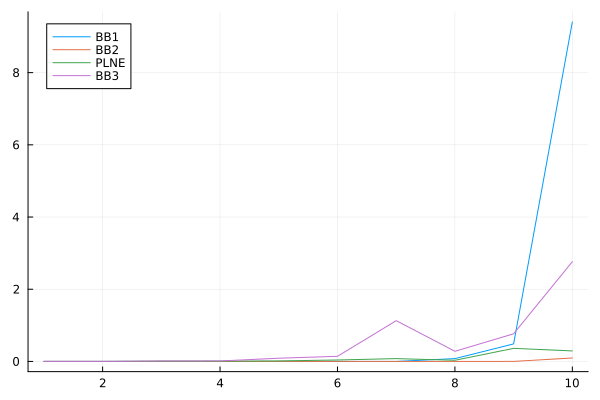

In [50]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

On observe ainsi qu'en moyenne, sur des échantillons générés aléatoirement, l'implémentation de type B&B n°2 reste la plus performante. Ce résultat était assez prévisible, puisque son fonctionnement est spécialement construit pour le problème : il est ciblé sur le cas d'étude.

A l'inverse, le fonctionnement des deux autres algorithmes de type B&B sont bien plus généraux : par exemple, la 3e version se base sur une règle de branchement complètement générale, qui fonctionne théoriquement avec toutes les formulations de type PLNE. D'ailleurs, ces deux autres formulations semblent avoir un temps d'exécution qui explose lorsque le nombre de patients croit. 

Toutefois, nous avons ici sélectionné des durées de rdv et dates de passages au plus tard dans des ordres de grandeurs assez similaires. Nous pouvons tenter de modifier ces paramètres, et voir si les mêmes résultats sont obtenus. Nous allons ici seulement diminuer les dates de passages au plus tard. Ainsi, les pénalités seront plus importantes, et nécesairement, le problème, plus complexe.

In [54]:
# Taille maximale des instances
nmax=10
# On initialise les vecteurs qui récupèreront les temps de calcul
tempsv1=zeros((1,nmax))
tempsv2=zeros((1,nmax))
tempsPLNE=zeros((1,nmax))
tempsv3=zeros((1,nmax))

for npatients in 1:nmax
    # Pour chaque taille, on choisit aléatoirement une instance
    P=vec(rand(1:10, 1,npatients))
    D=vec(rand(5:40, 1,npatients))
    H=vec(rand(30:60, 1,npatients))
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic

end

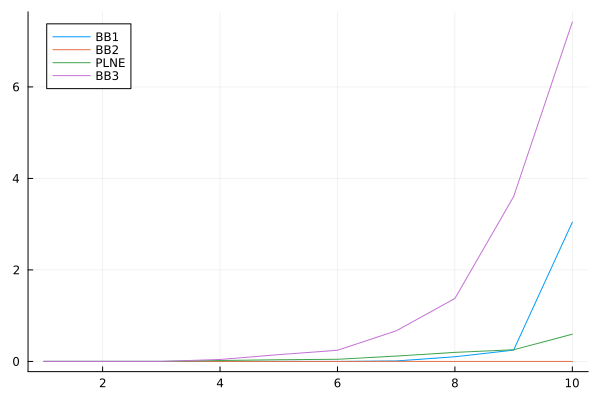

In [55]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Ce changement permet de mettre en évidence, de manière plus prononcée, l'explosion en temps de la version n°1 et n°3, lorsque le problème se complexifie.

Nous pouvons aussi voir que la version n°2 reste la meilleure, et qu'en moyenne, la résolution par solveur, avec la formulation PLNE, est plus performante que la version B&B n°3. Ce résultat semblait assez évident au premier abord, puisque le solveur utilisé réalise lui aussi un B&B avec relaxations à chaque noeud, mais est bien plus optimisé que notre version.

Nous remarquons ainsi que nos deux meilleurs algorithmes (en termes de temps de calcul) sont le Branch and Bound n°2, et la résolution par solveur du PLNE. Nous allons donc tenter de comparer ces deux implémentations.

Pour cela, nous commençons par établir jusqu'à quelle taille d'instance la fonction PLNE converge-t-elle en temps raisonable.

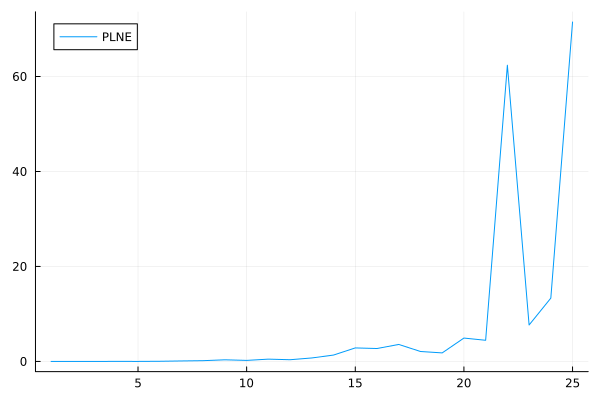

In [62]:
# Taille maximale des instances
nmax=25
# On initialise les vecteurs qui récupèreront les temps de calcul
temps=zeros((1,nmax))

for npatients in 1:nmax
    # Pour chaque taille, on choisit aléatoirement une instance
    P=vec(rand(1:10, 1,npatients))
    D=vec(rand(5:40, 1,npatients))
    H=vec(rand(30:60, 1,npatients))
    
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    temps[1,npatients]=tac-tic
    
end

plot(1:nmax,transpose(temps),label="PLNE")

On observe ainsi que la résolution par solveur peut être utilisée en temps raisonable jusqu'à une taille d'environ 25.

Qu'en est-il de la 2e version de notre Branch and Bound ?

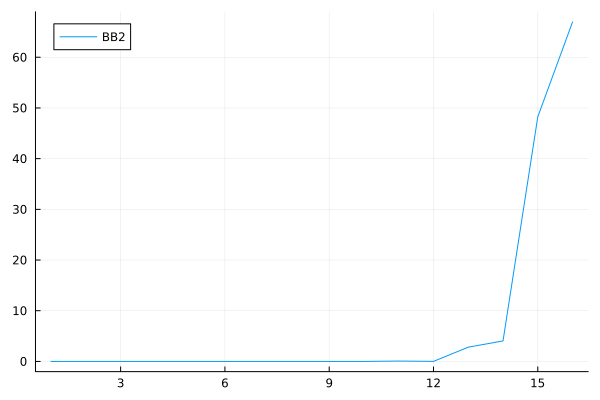

In [22]:
# Taille maximale des instances
nmax=16
# On initialise les vecteurs qui récupèreront les temps de calcul
temps=zeros((1,nmax))

for npatients in 1:nmax
    # Pour chaque taille, on choisit aléatoirement une instance
    P=vec(rand(1:10, 1,npatients))
    D=vec(rand(5:40, 1,npatients))
    H=vec(rand(30:60, 1,npatients))
    
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    temps[1,npatients]=tac-tic
    
end

plot(1:nmax,transpose(temps),label="BB2")

On observe qu'ici la 2e version du Branch and Bound donne la solution en un temps raisonnable pour des instances jusqu'à une dimension 16 environ.

Cette implémentation semble être la plus intéressante d'un point de vue pratique, pour un nombre de patients inférieur à 10. En effet, ici, la vie des patients est en jeu, et nous devons obtenir la solution le plus rapidement possible : chaque seconde compte ! En revanche, pour des patients plus nombreux, il serait plus cohérent d'utiliser la version PLNE.

Toutefois, ces observations ne sont réalisées que sur un certain nombre d'instances, et nous ne pouvons pas généraliser ces résultats à n'importe quelle instance existante.

## 2 - Performances avec des instances particulières

Comme annoncé précédemment, nous allons présenter des instances particulières pour lesquelles la solution peut sembler évidente. Pour autant, dans ce cas, certains algorithmes ne convergeront pas instantanément comme nous aurions pu le penser. 

### $\to$ Instance A : Un cas simple

On considère des patients "égaux" : avec les mêmes pénalités et les mêmes temps de traitement, et qui arrivent aux urgences de manière "uniforme" (nécessité de les traiter à des temps réguliers).

**1. Avec une possibilité d'avoir aucune pénalité**

Cette première instance est un exemple que l'on pourrait assigner à un dentiste par exemple, avec des rendez-vous, peu d'urgence, et des patients qui arrivent chacun à leur tour. Dans ce cadre, nous pouvons réussir à trouver une solution avec une pénalité nulle (puisque chaque patient a déjà pris rendez-vous, et chaque rendez-vous est assez rapide).

In [23]:
P=[1,1,1,1,1,1,1,1,1,1]
D=[5,5,5,5,5,5,5,5,5,5]
H=cumsum([5,5,5,5,5,5,5,5,5,5])


tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end



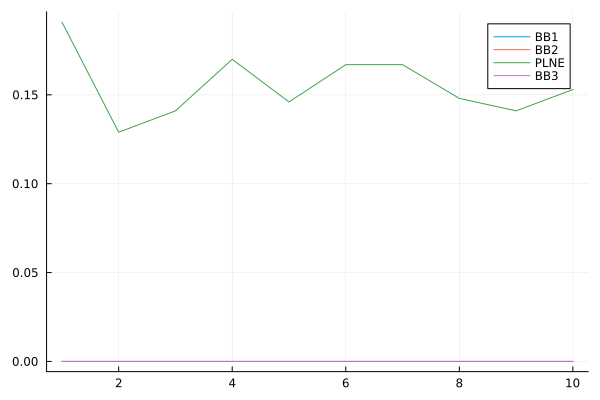

In [24]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

On observe ici que, dans ce premier cas de figure, les Branch and Bound 1, 2 et 3 sont très performants, et trouvent une solution au problème en un temps presque nul. Ceci est dû au fait que la borne primale initiale est déjà nulle, et ainsi, aucune itération n'est réalisée au cours de l'algorithme. 

A l'inverse, dans ce cas, la résolution du PLNE par solveur est aussi performante, mais bien plus lente : quelque soit la dimension du problème (pour des petite dimensions), la durée de résolution est similaire (et assez faible). En effet, cette implémentation est plus longue car elle doit construire le modèle, ce qui n'est pas instantané. En revanche, comme vu plus haut, sur des instances plus grande, elle sera plus efficace que les 3 autres.

Ainsi, dans ce premier cas, dont une solution peut très rapidement être trouvée à la main, on observe que tous les algorithmes ne sont pas aussi rapides que ce que nous pourrions penser.

**2. Avec des délais de traitement plus grands et donc une évidence d'avoir des pénalités**

Dans le cas précédent, tout s'organisait plutôt bien : la pénalité d'une solution optimale était nulle. Désormais, nous allons considérer un cas similaire au précédent, mais dans lequel les choses se corsent : des pénalités vont apparaître car nous augmentons les durées de rdv des patients.

Ici, nous pouvons associer ce second cas à un médecin généraliste, pour lequel les durées de rendez-vous sont théoriquement fixées (en général, autour de 15min), mais, très souvent, les durées de prise en charge des patients est bien plus grande, et du retard s'accumule au fil de la journée. 

In [25]:
P=[1,1,1,1,1,1,1,1]
D=[10,10,10,10,10,10,10,10]
H=cumsum([5,5,5,5,5,5,5,5])

tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end

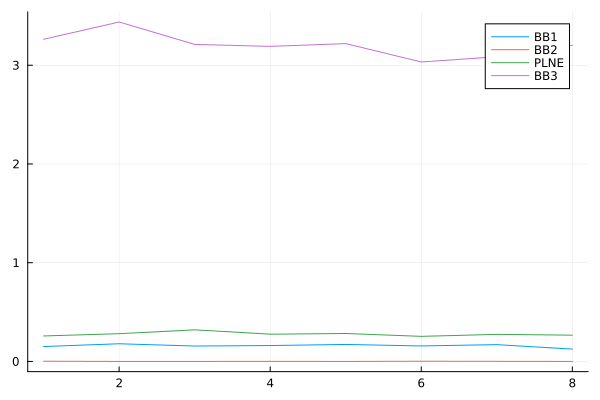

In [26]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Dans ce cas, si l'on trie les patients par H/P croissants, on observe que la borne primale utilisée en début d'algorithme est déjà optimale. 

Les Branch and Bound n°1 et 2 tirent profit de cette observation, puisque l'on observe que la convergence est assez rapide : 
 - Pour la version n°2, le résultat est obtenu presque instantanément. Cela signifie que l'on élague très vite, et on renvoie la borne assez rapidement (on considère chaque patient comme le dernier, et à chaque fois, on élague $\to$ on ne parcourt que $n$ noeuds).
 - Pour la version n°1, le résultat est légèrement plus long. Ici, le fait de parcourir l'arbre du début vers la fin induit un plus grand nombre de noeuds à parcourir. Il est ainsi plus long de prouver que la borne primale est en réalité la solution.
 
On observe que la 3e version est bien moins performante. En effet, elle est environ 10 fois plus lente que les autres. Dans notre cas, nous démarrons bien avec la même borne primale (solution optimale), mais les relaxations rendent des solutions optimales bien plus faibles que celle-ci. Ainsi, bien que la solution optimale soit conservée depuis le début de l'algorithme, de nombreuses itérations sont nécessaires avant de pouvoir conclure que z_barre est bien la solution optimale.

### $\to$ Instance B : Des patients "égaux" qui arrivent tous en même temps aux urgence 

On considère ici des patients identiques (comme dans le cas précédent : avec les mêmes pénalités et les mêmes temps de traitement), mais qui arrivent en même temps. Nous modélisons ici un cas simple pouvant être obtenu aux urgences : un groupe d'amis a été victime d'une infection alimentaire par exemple.

Il y a donc ici une nécessité de traiter tous les patients en même temps. 

Visuellement, il existe de nombreuses solutions optimales : n'importe quel ordre est acceptable. Ainsi, ce problème peut très facilement être résolu de tête. Qu'en est-il des algorithmes ? C'est ce que nous allons découvrir.

In [27]:
P=[1,1,1,1,1,1,1,1]
D=[5,5,5,5,5,5,5,5]
H=[5,5,5,5,5,5,5,5]

tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end

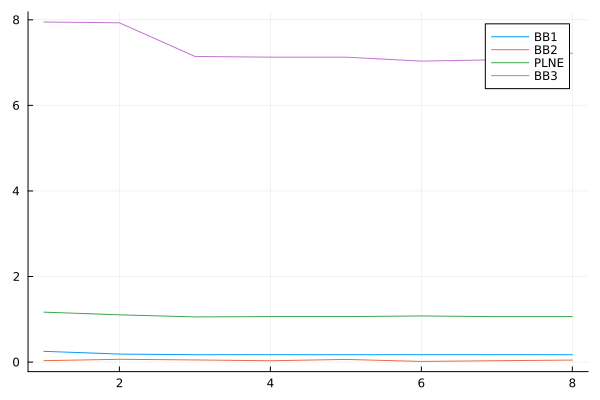

In [28]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Comme pour le cas précédent, dès le début, la borne primale des 3 algorithmes de Branch and Bound est la solution optimale.

Ainsi, comme pour le cas précédent, la version n°2 ne parcourt que n noeuds (élague à profondeur 1 pour chacun d'entre eux). 

Pour la version n°1, montrer que la borne supérieure est optimale nécessite de parcourir l'arbre dans son intégralité, d'où un temps d'exécution plus long.

Pour la 3e version, le fait de devoir parcourir l'arbre en entier, couplé à la création de modèles rend cette méthode très lente.

Le PLNE est quant à lui intermédiaire sur cette instance, bien que la symétrie du problème ne le rende pas spécialement performant.

Ici, nous avons montré une propriété assez intéressante du Branch and Bound utilisant la relaxtion du PLNE : il n'est pas performant dans des cas de symétries (nécessité de parcourir beaucoup de noeuds alors que la solution optimale est connue dès le début).

### $\to$ Instance C : Un patient très urgent et d'autres patients moins urgents "égaux"

On considère ici un autre cas typique des urgences : plusieurs patients similaires, avec un degré d'urgence assez faible, et un autre patient, plus gravement blessé. En réutilisant l'exemple précédent, on imagine que le groupe d'amis arrive aux urgences en même temps qu'une victime d'un accident de la route.

In [29]:
P=[5,1,1,1,1,1,1,1]
D=[50,5,5,5,5,5,5,5]
H=[0,5,5,5,5,5,5,5]


tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end

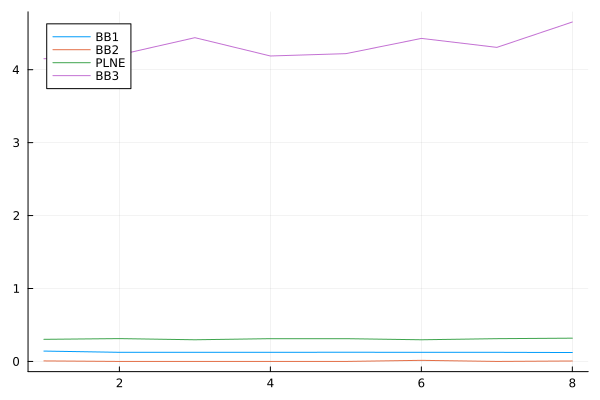

In [30]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Encore une fois, la solution nous semble évidente : faire passer le patient urgent en premier, et faire passer ensuite les patients égaux (dans n'importe quel ordre). Toutefois, les algorithmes implémentés de sont pas pour autant instantanés : mis à part le B&B n°2, tous les algorithmes convergent en des durées supérieures à 0 (tout de même inférieures à la seconde pour B&B n°1 et PLNE, mais plusieurs secondes pour le 3e B&B...).

### $\to$ Instance D : Un seul patient moins urgent que d'autres patients "égaux" 

Comme pour l'instance précédente, nous pouvons tout à fait considérer le cas inverse : une journée aux urgences, où la majorité des patients sont blessés à un degré d'urgence similaire, et un individu, lui, très légèrement blessé. 

In [52]:
P=[0.1,1,1,1,1,1,1,1]
D=[1,5,5,5,5,5,5,5]
H=[50,5,5,5,5,5,5,5]


tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end

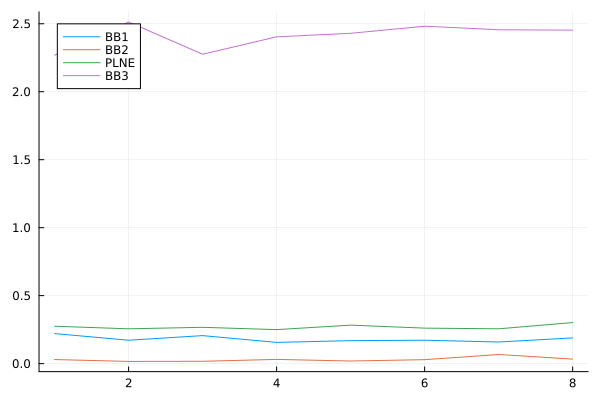

In [53]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Ici, on observe globalement le même type de graphique. Toutefois, les durées de calculs sont nettement plus faibles : ceci est certainement dû au fait que la présence du nouvel individu n'ajoute pas une grande pénalité (tout se passe comme si il n'y avait que n-1 patients).

### $\to$ Instance E : problème infaisable à la main

On considère ici un problème où toutes les données s'entremêlent, empêchant de pouvoir trouver une solution à la main sans avoir recours à l'énumération de toutes les solutions possibles.

In [33]:
P=[4,7,10,1,0.1,18,5,2,7,12,1]
D=[10,12,25,23,5,15,3,35,39,10,4]
H=[25,19,48,27,32,23,3,41,80,11,18]


tempsv1=zeros((1,length(P)))
tempsv2=zeros((1,length(P)))
tempsPLNE=zeros((1,length(P)))
tempsv3=zeros((1,length(P)))
nmax=length(P)

for npatients in 1:length(P)
    P1=P[1:npatients]
    D1=D[1:npatients]
    H1=H[1:npatients]
    # B&B v1
    tic=time()
    Branch_Bound_v1(P,D,H)
    tac=time()
    tempsv1[1,npatients]=tac-tic
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
    # B&B v3
    tic=time()
    Branch_Bound_v3(P,D,H)
    tac=time()
    tempsv3[1,npatients]=tac-tic
end

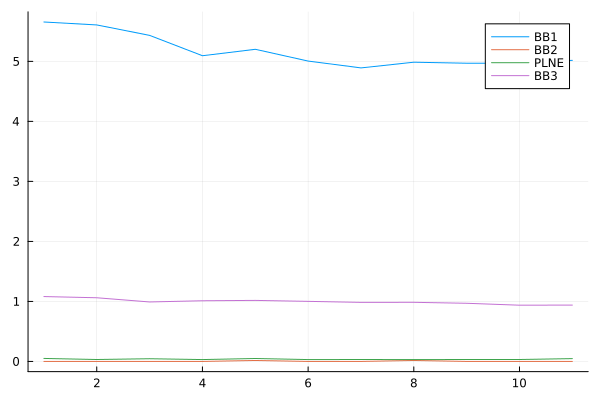

In [34]:
plot(1:nmax,transpose(tempsv1),label="BB1")
plot!(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")
plot!(1:nmax,transpose(tempsv3),label="BB3")

Ici, nous pouvons vanter les mérites de nos implémentations : pour un problème pouvant prendre des heures à résoudre à la main, nous pouvons ici obtenir une solution optimale en une fraction de secondes.

Tout particulièrement, le B&B n°2 et le PLNE permettent l'obtention d'une solution en un temps presque nul (obtention quasi immédiate).

Pour les simulations de cas pratiques, nous choisirons des exemples parlants avec peu de patients, et donc notre stratégie s'appuiera sur l'utilisation du B&B n°2, le plus efficace pour des instances de taille inférieure à 15 :

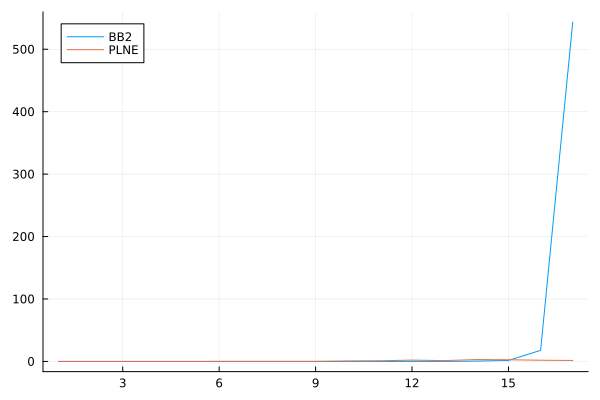

In [65]:
# Taille maximale des instances
nmax=17
# On initialise les vecteurs qui récupèreront les temps de calcul
tempsv2=zeros((1,nmax))
tempsPLNE=zeros((1,nmax))


for npatients in 1:nmax
    # Pour chaque taille, on choisit aléatoirement une instance
    P=vec(rand(1:10, 1,npatients))
    D=vec(rand(5:40, 1,npatients))
    H=vec(rand(30:60, 1,npatients))
    # B&B v2
    tic=time()
    Branch_Bound_v2(P,D,H)
    tac=time()
    tempsv2[1,npatients]=tac-tic
    # PLNE
    tic=time()
    solve_PLNE(PLNE(P,D,H))
    tac=time()
    tempsPLNE[1,npatients]=tac-tic
end

plot(1:nmax,transpose(tempsv2),label="BB2")
plot!(1:nmax,transpose(tempsPLNE),label="PLNE")

On remarque bien ici, que, pour des instances plus petites, la création du modèle fait perdre un peu de temps au PLNE tandis que le B&B n°2 trouve quasiment instantanément une solution optimale. En revanche, pour des tailles d'instances plus grandes (au dela de 15), le PLNE "rattrape" le B&B n°2 et est donc plus efficace. Nous choisirons, pour nos instances pratiques de petites tailles, l'algorithme du B&B n°2.